In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

#loading dataset
ct_data=pd.read_csv(r'/Users/Sindhuja_reddy/Downloads/superconduct/train.csv')

In [2]:
ct_data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
ct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [4]:
#x nd y define
x=ct_data.drop(['critical_temp'],axis=1).values
y=ct_data['critical_temp'].values

In [5]:
print(x)


[[ 4.         88.9444675  57.86269229 ...  1.08571429  0.4330127
   0.43705882]
 [ 5.         92.729214   58.51841614 ...  1.12857143  0.63245553
   0.46860627]
 [ 4.         88.9444675  57.88524186 ...  1.11428571  0.4330127
   0.44469664]
 ...
 [ 2.         99.66319    95.609104   ...  3.2         0.5
   0.4       ]
 [ 2.         99.66319    97.0956022  ...  2.21        0.5
   0.46249324]
 [ 3.         87.46833333 86.8585     ...  1.8         1.41421356
   1.5       ]]


In [6]:
print(y)

[29.   26.   19.   ...  1.98  1.84 12.8 ]


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR_CT=LR.fit(x_train,y_train)


In [9]:
y_predict=LR.predict(x_test)
print(y_predict)

[73.71131548 69.41280364 18.05441219 ...  5.65057684 26.94130109
 74.60546593]


In [10]:
LR.coef_

array([-3.36362545e+00,  8.27363131e-01, -9.03061944e-01, -5.00408712e-01,
        6.54813958e-01, -3.60788610e+01,  3.31389639e+00,  2.04101854e-01,
        2.32636851e-02, -5.37726448e-01,  9.15347258e-02,  1.23822797e-01,
       -1.65335747e-01, -1.16009961e-01,  1.84009580e-01, -1.15482276e+02,
        4.20059926e+01,  6.82509611e-02,  2.20607126e-02, -2.00329892e-01,
       -2.26065517e-02, -4.65812870e-01,  3.22604631e+00,  1.22756453e-01,
       -2.83393244e+00,  8.15502189e+01,  4.46630106e+01,  1.85024951e-01,
       -9.37456962e-02, -2.99191240e-01, -3.53790737e-01, -4.60000228e-03,
       -1.66292122e-04,  1.29391589e-03,  2.04795166e-03,  1.59966735e+01,
       -1.89756004e+01, -1.56951651e-03,  1.20719045e-04,  6.27835472e-03,
       -1.89569154e-03, -1.09880724e-01,  5.35318761e-01,  1.78438001e-01,
       -5.84016106e-01,  4.05797251e+00, -2.13651050e+01, -3.54418302e-01,
       -1.42447920e-01,  1.21298984e+00, -5.45765555e-01,  1.65825083e+00,
       -1.84758268e+00, -

In [11]:
LR.intercept_

-17.95689825855152

In [12]:
LR.predict([[4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.6225345301219,775.425,1010.26857142857,718.15289995213,938.016780052204,1.30596703599158,0.791487788469155,810.6,735.985714285714,323.811807806633,355.562966713294,160.25,105.514285714286,136.126003095455,84.528422716633,1.25924397214289,1.20703998701461,205,42.9142857142857,75.2375404967494,69.2355694829807,4654.35725,2961.50228571429,724.953210852388,53.5438109235142,1.03312880053102,0.814598190091683,8958.571,1579.58342857143,3306.1628967555,3572.59662370838,81.8375,111.7271429,60.12317856,99.41468205,1.159686593,0.787381691,127.05,80.98714286,51.43371189,42.55839575,6.9055,3.846857143,3.479474849,1.040985986,1.088575342,0.994998193,12.878,1.744571429,4.599064117,4.666919554,107.756645,61.01518857,7.06248773,0.621979487,0.30814799,0.262848266,399.97342,57.12766857,168.8542438,138.5171625,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059]])

array([30.63297224])

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7350976364618425

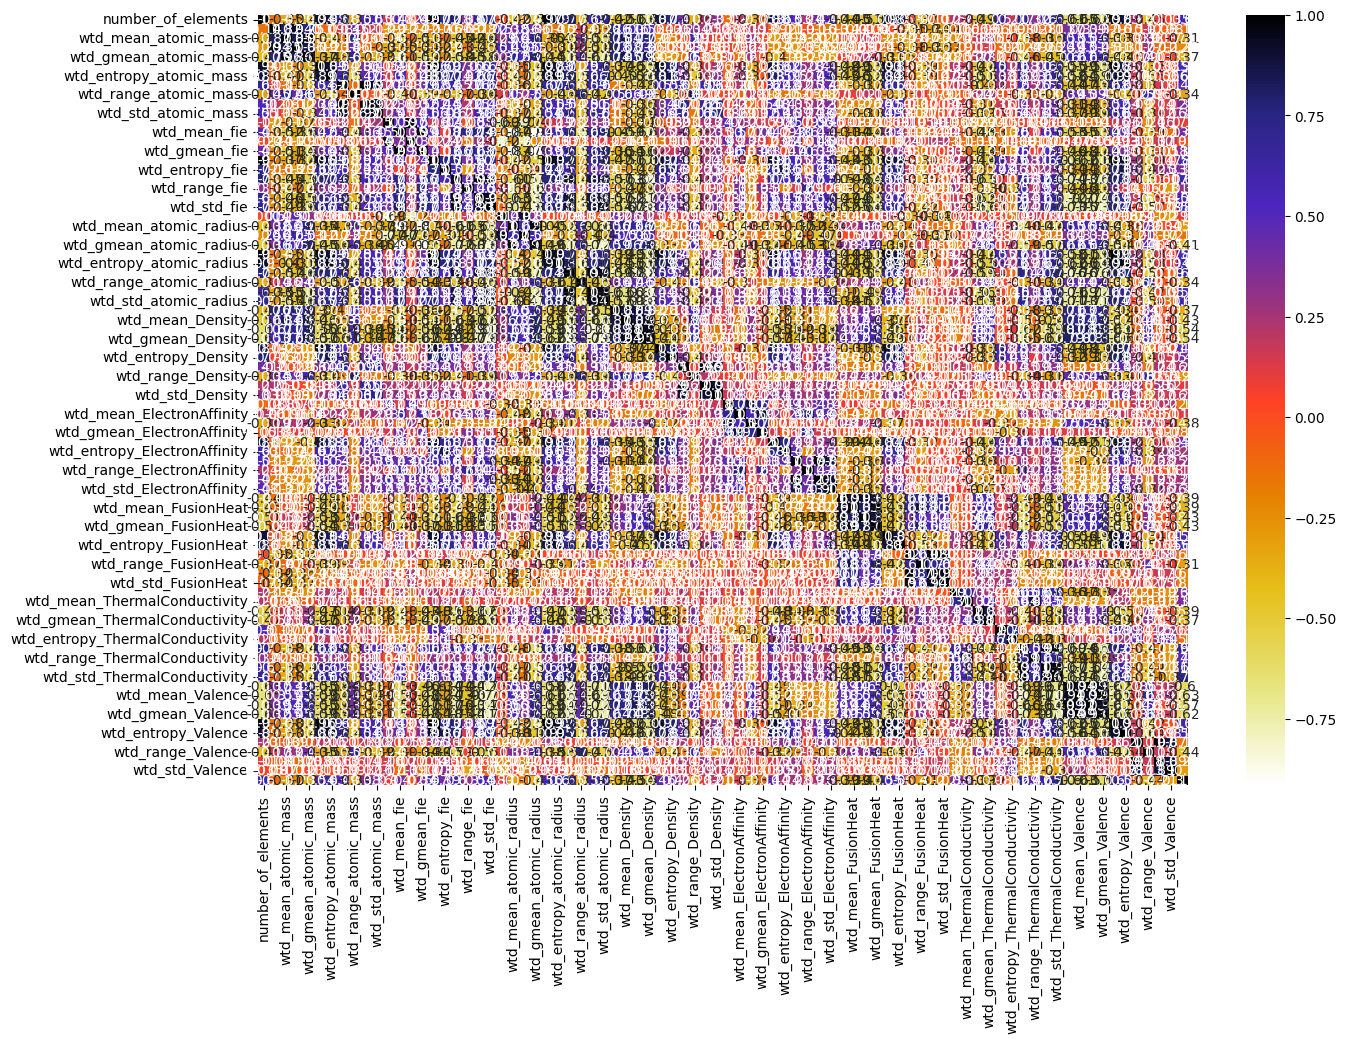

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
correlation = ct_data.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Text(0.5, 1.0, 'Actual vs. Predicted')

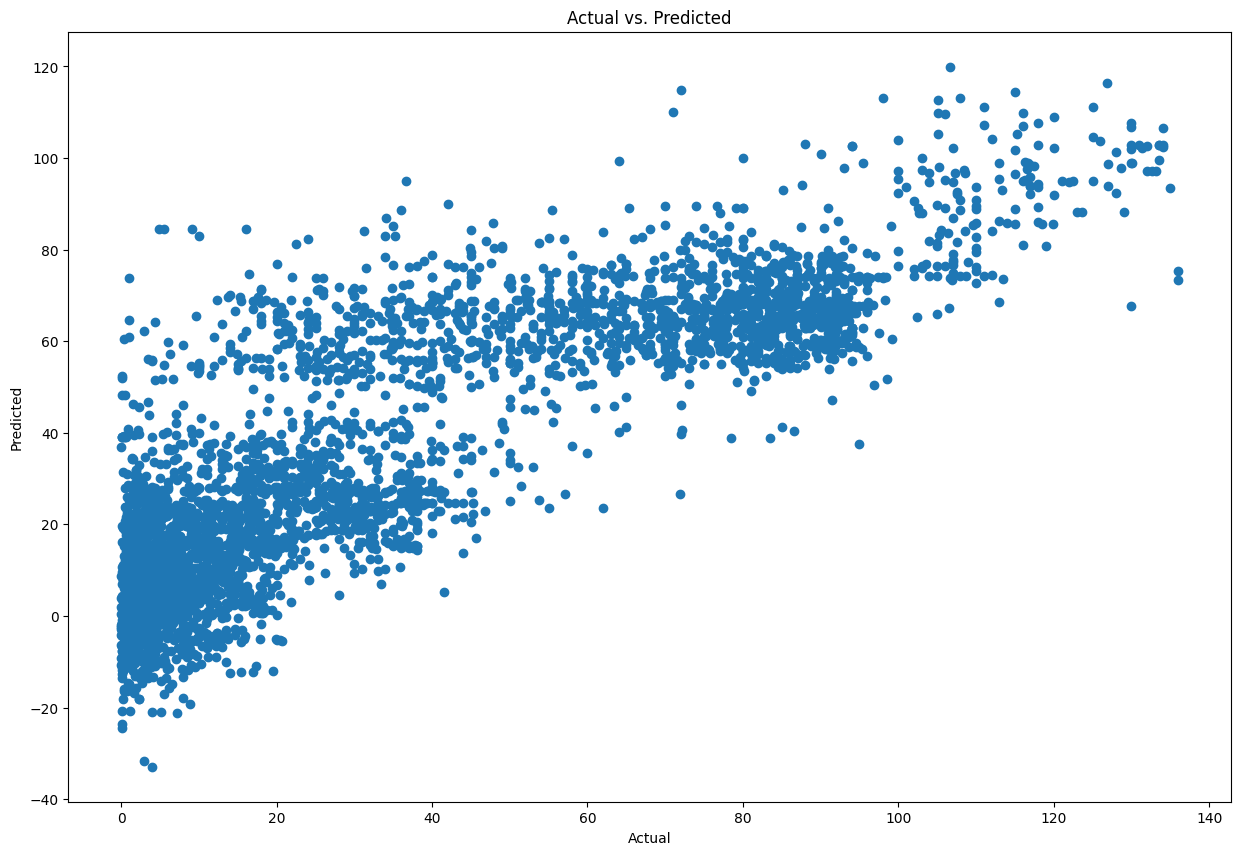

In [15]:
import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [16]:
pred_y_data=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_predict,'Difference':y_test-y_predict})
pred_y_data[0:20]

,Actual Value,Predicted value,Difference
0,85.00,73.711315,11.288685
1,85.50,69.412804,16.087196
2,11.60,18.054412,-6.454412
3,16.00,56.414767,-40.414767
4,107.00,76.625806,30.374194
5,10.00,-4.683086,14.683086
6,4.60,8.925484,-4.325484
7,10.80,20.759761,-9.959761
8,11.00,-7.015177,18.015177
9,90.80,73.487444,17.312556


C:\Users\Sindhuja_reddy\AppData\Local\Temp\ipykernel_14536\3871032934.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)


Text(0.5, 1.0, 'Actual vs. Predicted')

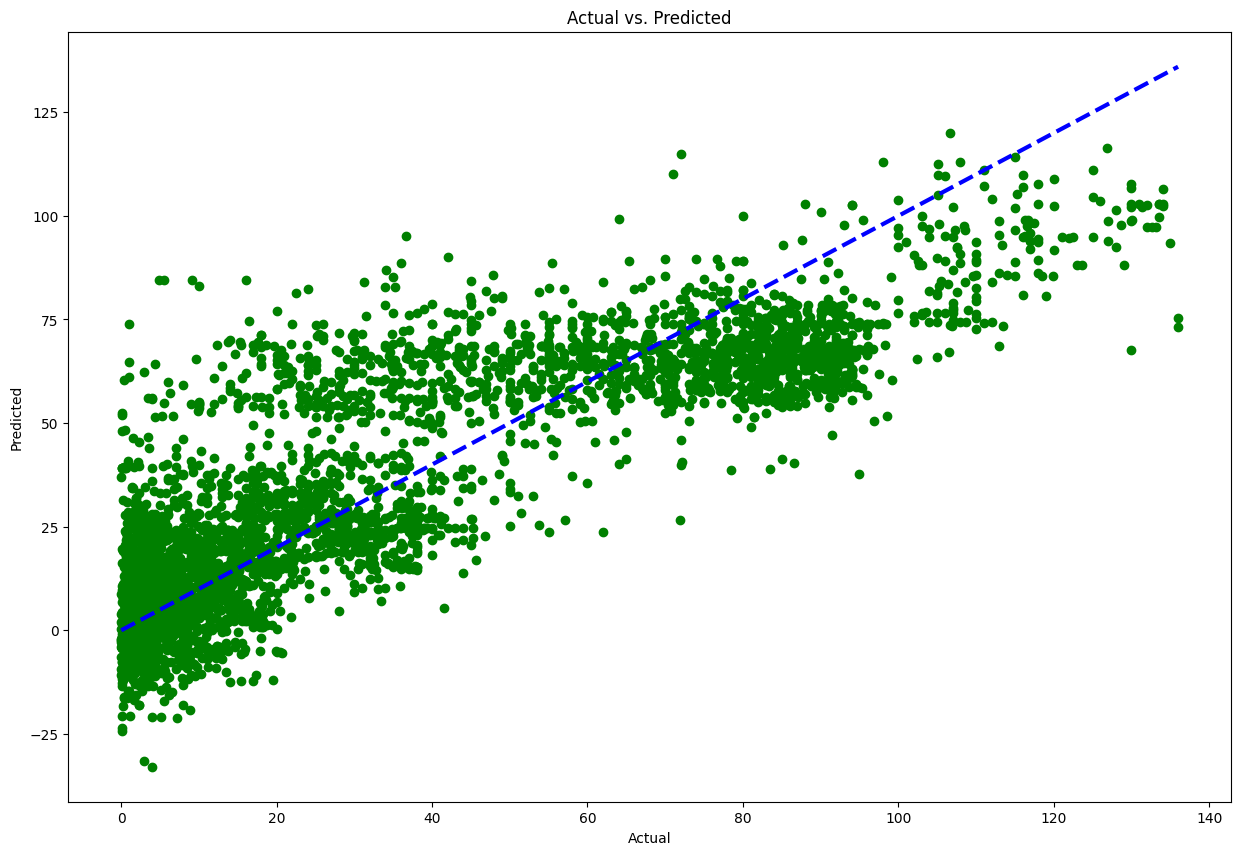

In [17]:
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict,c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [18]:
np.sqrt(mean_squared_error(y_test,y_predict))

17.55907945164462

In [19]:
np.abs(r2_score(y_test,y_predict))

0.7350976364618425